In [1]:
# Imports.
root = r'C:\Users\edova\Documents\GitLab\ctrappy'
import sys
import os
sys.path.append(root)
import ctrappy.gui_figures
import ctrappy.file
import ctrappy.scan
import yaml
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Open file.
scans_path = r'data\scans_filtering.csv'
df_scans = pd.read_csv(scans_path)

In [3]:
# Initialize.
CONFIG = ctrappy.file.read_config('data/config_QTrap.yaml')
experiment = ctrappy.scan.Experiment(df_scans, CONFIG, df_scans['laser_colors'].iloc[0], redo_step_fitting=False)
starting_frame = 5
kbp_locs = [1, 20.130]
total_count = 10
  
experiment_filtered = ctrappy.scan.filter_experiment(experiment, starting_frame, kbp_locs, total_count, keep_coloc=False)

frame filtering, total: 810 kept: 192
loc filtering, total: 192 kept: 93
count filtering, total: 93 kept: 91


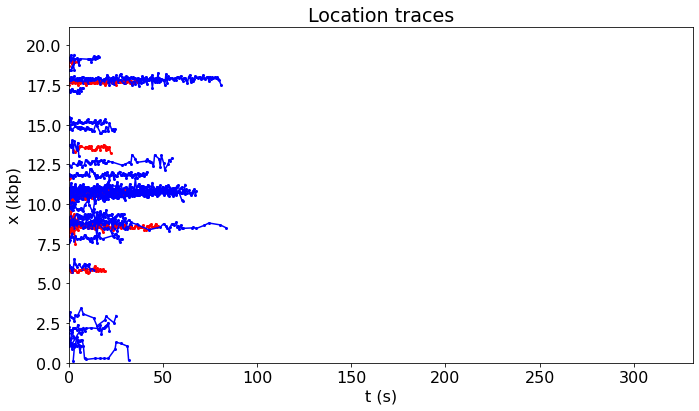

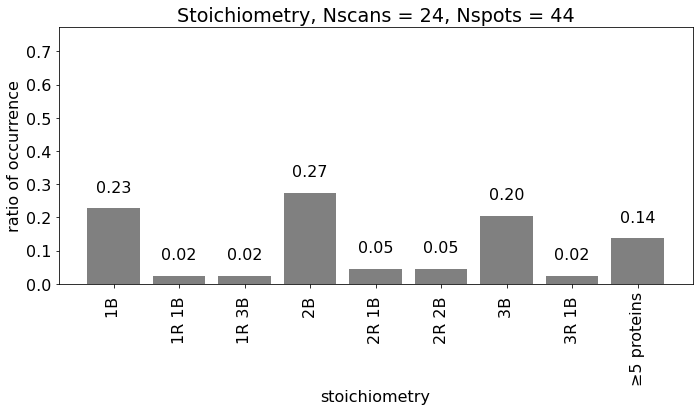

In [4]:
# Full experiment.
experiment = experiment_filtered
experiment = experiment.filter_by_stoichiometry(r_range=[0, 10], g_range=[0, 0], b_range=[1, 10])

data = ctrappy.gui_figures.get_stoichiometry(experiment)
fig = ctrappy.gui_figures.plot_stoichiometry(data)

data = ctrappy.gui_figures.get_location_traces(experiment, loc_kbp=True, time_s=True)
fig = ctrappy.gui_figures.plot_location_traces(data)
fig

In [5]:
# Filter out central area.
experiment_left = experiment_filtered.filter_by_loc_kbp(1, 21.130 / 2 - 0.588, keep_coloc=True)
experiment_right = experiment_filtered.filter_by_loc_kbp(21.130 / 2 + 0.588, 20.130, keep_coloc=True)
df_scans0 = experiment_left.to_dataframe()
df_scans1 = experiment_right.to_dataframe()

# Combine scans and save.
df_scans0_copy = df_scans0.copy()
df_scans1_copy = df_scans1.copy()
df_scans1_copy['scan_id'] = df_scans1_copy['scan_id'] + df_scans0_copy['scan_id'].max() + 1
scans_combined = df_scans0_copy.append(df_scans1_copy, ignore_index=True)
scans_combined['index'] = scans_combined.index.values

scans_combined
# scans_combined.to_csv(r'C:\Users\edova\Downloads\scans (45).csv', index=False)

loc filtering, total: 91 kept: 30
loc filtering, total: 91 kept: 38


frame  intensity  frame_subindex  track_id  scan_id  dna_start_pixel  \
0         0      423.0               1         1        0        -5.293985   
1         0       41.0               1        84        0        -5.293985   
2         1      422.0               3         1        0        -5.293985   
3         1       35.0               1        84        0        -5.293985   
4         2      388.0               5         1        0        -5.293985   
...     ...        ...             ...       ...      ...              ...   
1498     78       18.0               0        13       43        -0.130583   
1499     79       20.0               0        13       43        -0.130583   
1500     80       16.0               0        13       43        -0.130583   
1501     81       24.0               0        13       43        -0.130583   
1502     82       22.0               0        13       43        -0.130583   

      dna_end_pixel  n_scans  n_frames     x_pixel  ...  col_dist  trace_id  \
0        116.105432       24       552   34.000000  ...       NaN         1   
1        116.105432       24       552    5.629652  ...       NaN        84   
2        116.105432       24       552   36.900970  ...       NaN         1   
3        116.105432       24       552    1.000000  ...       NaN        84   
4        116.105432       24       552   40.040064  ...       NaN         1   
...             ...      ...       ...         ...  ...       ...       ...   
1498     124.424594       24       153  104.110220  ...       NaN        13   
1499     124.424594       24       153  107.486124  ...       NaN        13   
1500     124.424594       24       153  104.144017  ...       NaN        13   
1501     124.424594       24       153  104.571996  ...       NaN        13   
1502     124.424594       24       153  105.073625  ...       NaN        13   

      corrected_intensity dna_length_kbp laser_colors  time_s      x_kbp  \
0                   423.0          21.13           rb     0.0   6.839258   
1                    41.0          21.13           rb     0.0   1.901298   
2                   422.0          21.13           rb     0.6   7.344182   
3                    35.0          21.13           rb     0.6   1.095490   
4                   388.0          21.13           rb     1.2   7.890552   
...                   ...            ...          ...     ...        ...   
1498                 18.0          21.13           rb    46.8  17.683795   
1499                 20.0          21.13           rb    47.4  18.256495   
1500                 16.0          21.13           rb    48.0  17.689528   
1501                 24.0          21.13           rb    48.6  17.762132   
1502                 22.0          21.13           rb    49.2  17.847230   

      step_count  lifetime  index  
0            4.0      77.0      0  
1            1.0       6.0      1  
2            4.0      77.0      2  
3            1.0       6.0      3  
4            4.0      77.0      4  
...          ...       ...    ...  
1498         2.0      83.0   1498  
1499         2.0      83.0   1499  
1500         2.0      83.0   1500  
1501         2.0      83.0   1501  
1502         2.0      83.0   1502  

[1503 rows x 26 columns]

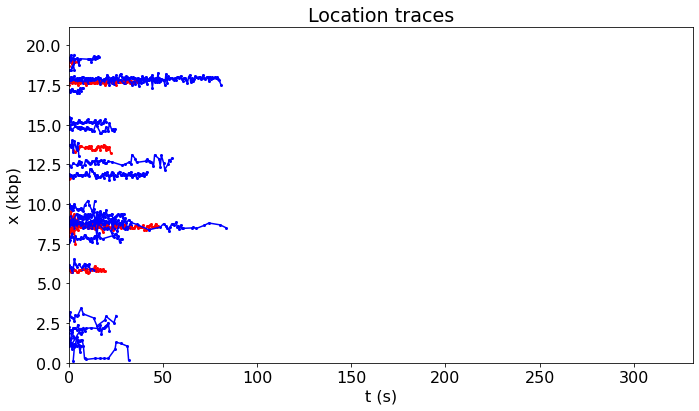

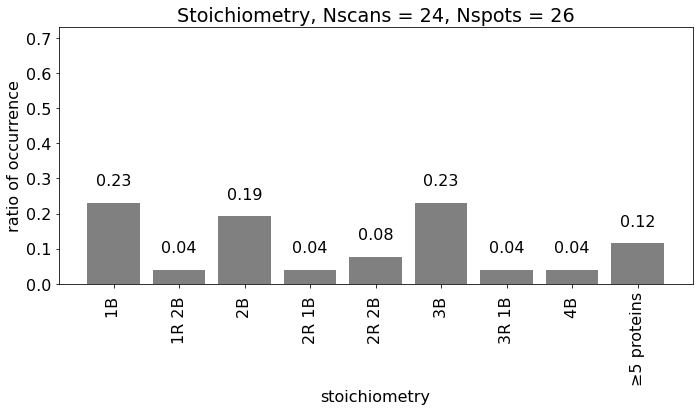

In [6]:
# Plot location traces.
experiment = ctrappy.scan.Experiment(scans_combined, CONFIG, scans_combined['laser_colors'].iloc[0])
experiment = experiment.filter_by_stoichiometry([0, 10], [0, 0], [1, 10])

data = ctrappy.gui_figures.get_stoichiometry(experiment)
fig = ctrappy.gui_figures.plot_stoichiometry(data)

data = ctrappy.gui_figures.get_location_traces(experiment, loc_kbp=True, time_s=True)
fig = ctrappy.gui_figures.plot_location_traces(data)
fig

loc filtering, total: 91 kept: 23


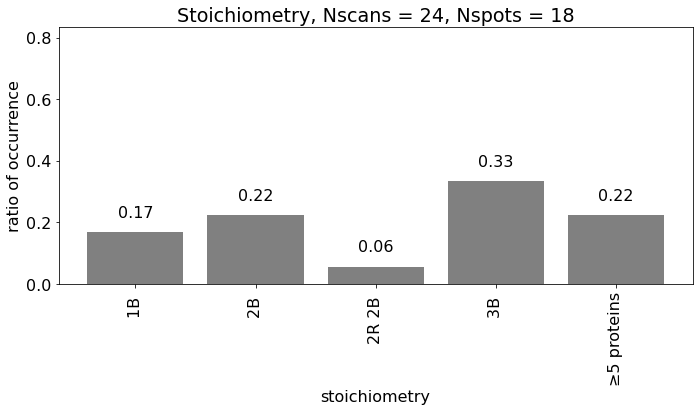

In [7]:
# Center area.
experiment = experiment_filtered.filter_by_loc_kbp(21.130 / 2 - 0.588, 21.130 / 2 + 0.588, keep_coloc=True)
experiment = experiment.filter_by_stoichiometry([0, 10], [0, 0], [1, 10])

data = ctrappy.gui_figures.get_stoichiometry(experiment)
fig = ctrappy.gui_figures.plot_stoichiometry(data)

data = ctrappy.gui_figures.get_location_traces(experiment, loc_kbp=True, time_s=True)
fig = ctrappy.gui_figures.plot_location_traces(data)
fig